# Authorea NB Test

## Setup

In [2]:
# Importage
# ---------


# Generic stuff

import numpy as np,pandas as pd
from itertools import product



# Math and stats stuff

from scipy.stats import gamma as gammadist

from sympy import oo,symbols,gamma
from sympy.stats import Gamma, Normal, Uniform, E, density, sample_iter
from sympy.stats.crv_types import GammaInverseDistribution,GammaInverse,SingleContinuousDistribution,Interval
from sympy.stats.crv_types import rv,_value_check

import statsmodels.formula.api as sm
from statsmodels.graphics import utils,regressionplots as rps
from statsmodels.graphics.regressionplots import plot_fit
from statsmodels.formula import api as sm

import uncertainties
from uncertainties import ufloat 

from sklearn.feature_selection import RFE




# Viz stuff

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from IPython.display import Image, HTML, display

from sympy.interactive import printing
printing.init_printing()



In [3]:
sns.set_style('white')

NameError: name 'sns' is not defined

## CC Gamma distributions

In [4]:
# Gamma Distribution Parameters Dataframe

gamparams = np.array([['Region'        , 'Shape_n' , 'Shape_s', 'Scale_n',  'Scale_s'   ],
                      ['Genu'          ,  5.3316 ,    0.1 ,      2.05E-1 ,      0.01    ], #2.05E-07],
                      ['AnteriorBody'  ,  3.5027 ,    0.1 ,      3.27E-1 ,      0.01    ], #3.27E-07],
                      ['MidBody'       ,  2.8771 ,    0.1 ,      4.99E-1 ,      0.01    ], #4.99E-07],
                      ['PosteriorBody' ,  3.2734 ,    0.1 ,      4.91E-1 ,      0.01    ], #4.91E-07],
                      ['Splenium'       , 4.8184 ,    0.1 ,      2.6E-1  ,      0.01    ] ] ) # 2.60E-07] ])

dfg = pd.DataFrame(data = gamparams[1:, 1:], 
                   columns = gamparams[0 , 1:], 
                   index   = gamparams[1:, 0 ]).T                                       
dfg = dfg.convert_objects(convert_numeric=True)

cov_th_k = dfg.T.cov()['Scale_n']['Shape_n'] # covariance of theta and k


# Other Parameters Dataframe
dfo= pd.DataFrame(index = ['L_n', 'L_s', 'g_n', 'g_s', 'cm_n', 'cm_s','cu_m','cu_s'],
                  data=   [100.0,  10.0,  0.6 ,  0.1 ,   5.5 ,    0  ,  3.2 ,   0  ] ).T 
dfo = dfo.convert_objects(convert_numeric=True)

/alexandra/mcintosh_lab/john/Software/miniconda2/envs/_jupyter/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/alexandra/mcintosh_lab/john/Software/miniconda2/envs/_jupyter/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [5]:
dfg

,Genu,AnteriorBody,MidBody,PosteriorBody,Splenium
Shape_n,5.3316,3.5027,2.8771,3.2734,4.8184
Shape_s,0.1000,0.1000,0.1000,0.1000,0.1000
Scale_n,0.2050,0.3270,0.4990,0.4910,0.2600
Scale_s,0.0100,0.0100,0.0100,0.0100,0.0100


In [6]:
dfo

,L_n,L_s,g_n,g_s,cm_n,cm_s,cu_m,cu_s
0,100.0,10.0,0.6,0.1,5.5,0.0,3.2,0.0


/alexandra/mcintosh_lab/john/Software/miniconda2/envs/_jupyter/lib/python2.7/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


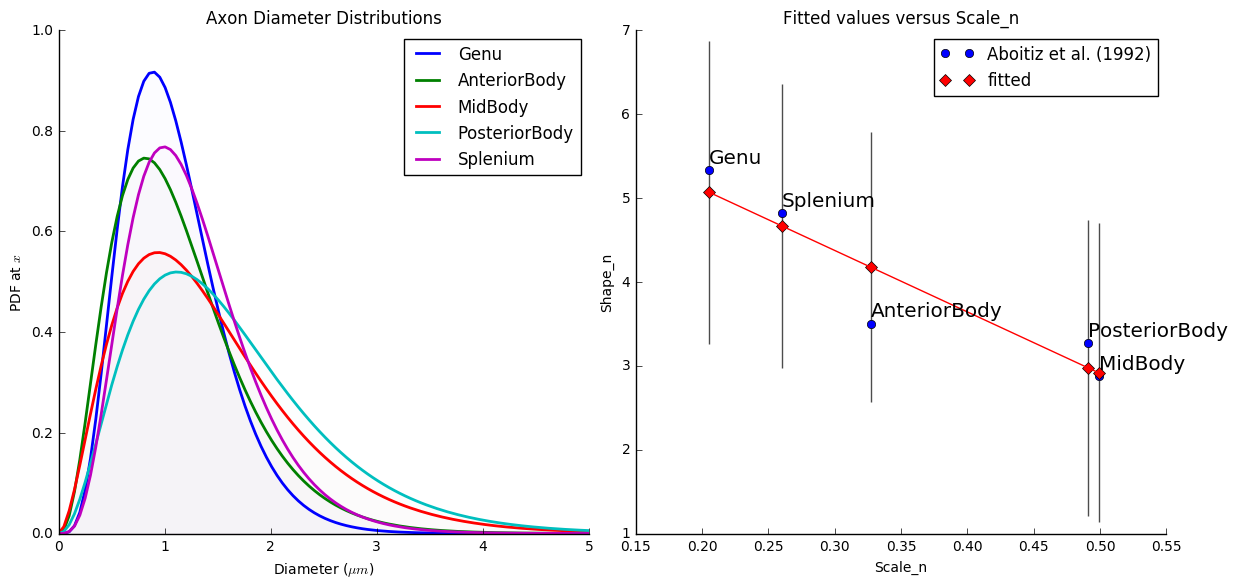

In [7]:
tmpfig = 'figures/temp_fig.png'
figname = 'figures/Ch3_gamma_distributions_regression_plot.png'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))#5, 3))


colors = matplotlib.rcParams['axes.color_cycle']
#fig, ax = plt.subplots() #plt.figure(figsize=(12, 6))
x = np.linspace(0, 10, num=200)
for g, c in zip(dfg, colors):
  sc = dfg[g]['Scale_n']; sh = dfg[g]['Shape_n']
  dat = gammadist.pdf(x, sh, scale=sc)
  ax[0].plot(x, dat, lw=2, c=c, label=g) #label = r"%s:$ k=%s, \theta=%s$" %(g, sh, sc)  )
  ax[0].fill_between(x, dat, color=c, alpha=0.01) 

#ax.legend(loc=2); # upper left corner    
ax[0].set_xlabel(r'Diameter ($\mu m$)' )
ax[0].set_ylabel('PDF at $x$')
ax[0].set_xlim([0, 5])
ax[0].legend(loc=0)    
ax[0].set_title("Axon Diameter Distributions")
#for a in ax[0].spines: ax[0].spines[a].set_color('none') # quicker way of doing this?
for a in ['top', 'right']: ax[0].spines[a].set_color('none') # quicker way of doing this?

ax[0].yaxis.tick_left() # only ticks on the left side
ax[0].xaxis.tick_bottom() # only ticks on the left side

#ax[0].set_frame_on(False)
#figname1 = '/tmp/aboitiz_gamma_distributions.png'
#plt.savefig(figname1, dpi=800)
#plt.close()
plt.tight_layout()


# Regression plot
res = sm.ols(formula = 'Shape_n ~ Scale_n', data = dfg.T).fit()
x = np.linspace(dfg.T.Scale_n.min(), dfg.T.Scale_n.max())
#fig, ax =  plt.subplots() #(figsize=(4,4))
rps.plot_fit(res, 'Scale_n', ax=ax[1])#, obs_labels=True)
ax[1].set_xlim([0.15, 0.55])
#fig = plt.plot(dfg.T.Scale, res.fittedvalues, 'r--.') #, ax = ax)
ax[1].plot(dfg.T.Scale_n, res.fittedvalues, 'r--.', alpha=.01) #, ax = ax)
ax[1].plot(x, res.predict({'Scale_n': x}), 'r-')#, alpha=.01) #, ax = ax)
for a in ['top', 'right']: ax[1].spines[a].set_color('none') # quicker way of doing this?
#ax[1].spines['left'].set_linewidth(2)
ax[1].yaxis.tick_left() # only ticks on the left side
ax[1].xaxis.tick_bottom() # only ticks on the left side

# label the points
labels = list(dfg.columns); index = range(len(labels)); 
points = zip(dfg.T.Scale_n, dfg.T.Shape_n); offset_points = [(0, 5)] * len(labels); size = "x-large"
utils.annotate_axes(index,labels, points, offset_points, size, ax=ax[1])

# NEE TO RE-DO THIS LEGEND SOMEHOW SO THERE AREN'T DOUBLE SPOTS
#axgca = plt.gca(); axgca.legend_ = None; plt.draw()
ax[1].legend(('Aboitiz et al. (1992)', 'fitted'))#('label 1', 'label 2'))

##plt.tight_layout()